In [ ]:
# Importing libraries :

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset :


df = pd.read_csv(r"C:\Users\yekka\Downloads\Housing.csv")

In [10]:
#Data Preprocessing :
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [12]:
df.shape

(545, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
# REMOVAL OF DUPLICATE VALUE 

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [16]:
# CONVERTING ALL OUR CATEGORICAL DATA COLUMNS TO NUMERIC FORM

from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)


In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<AxesSubplot:>

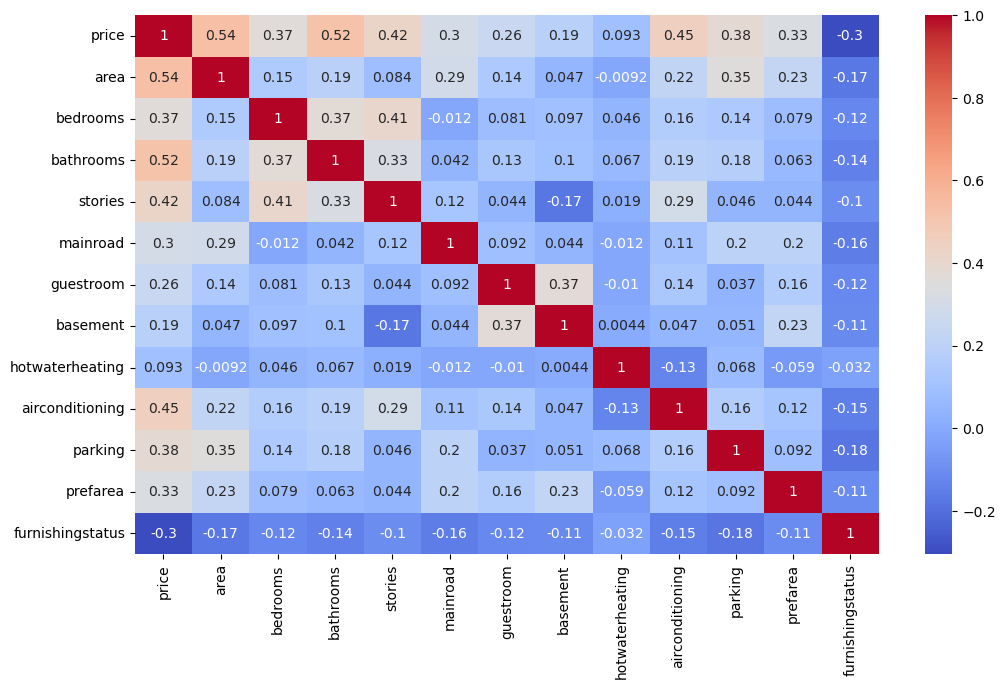

In [18]:
# CORRELATION BETWEEN THE COLUMNS

corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='coolwarm',annot=True)

# Spliting The Dataset :

X = df.drop(['price'],axis=1)
y = df['price']

In [21]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [22]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
# LENGTH OF X_train AND X_test

len(X_train),len(X_test)

(381, 164)

In [25]:
# IMPORTING THE MODULE

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
# FITTING THE DATA INTO THE MODEL

model.fit(X_train,y_train)

LinearRegression()

In [27]:
# PREDICTING THE OUTCOMES

y_predict = model.predict(X_test)

In [28]:
y_predict

array([5407508.87024418, 7097185.46706854, 3055462.44314053,
       4476945.19636315, 3315983.65663579, 3618373.03255259,
       5758111.46044028, 6466502.43909126, 2830273.16469119,
       2588804.65810567, 9649589.31414054, 2830606.51113843,
       3048137.62898116, 3392779.60203048, 3823232.9673009 ,
       5358170.87034032, 2955016.41578148, 4836054.53230682,
       4603068.47740645, 3551464.60674927, 5625018.82657786,
       5796938.54363456, 2758483.74755246, 4873266.20950521,
       5600804.93370716, 7772078.63540938, 3381536.16270183,
       5370732.06725797, 8352665.9587942 , 3406110.06934798,
       6335677.41367624, 3427228.10570008, 6740746.88053742,
       4205633.93578768, 3624702.80095917, 5797171.46441145,
       5080025.13346592, 4386055.52335342, 3070137.54474224,
       4635050.40917587, 4743419.55702887, 3433682.48420934,
       7076940.4807988 , 4096598.07073102, 3741261.35302813,
       4308416.36745432, 6678982.6364043 , 4092649.04459023,
       3872211.05471678,

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [30]:
score

0.6435419628959106

In [31]:
mae


925543.5483156563

# Pairplot and Distplot
import seaborn as sns
sns.pairplot(df)
plt.show()

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

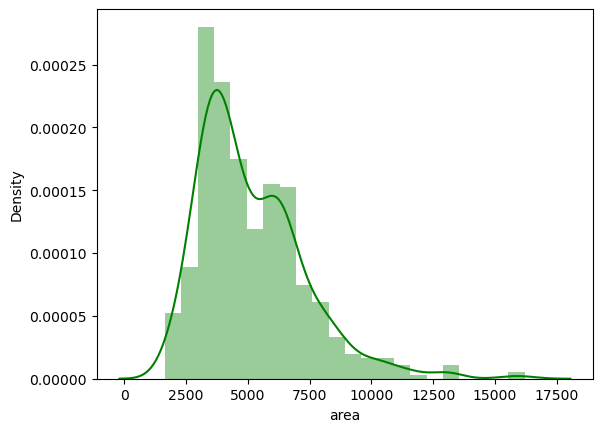

In [34]:
sns.distplot(df['area'], color='green')
plt.show()

In [39]:
#Identifying features and label
x=df.drop(['basement', 'hotwaterheating'], axis=1)
y=df['basement']
x.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,2,1,0
9,9800000,5750,3,2,4,1,1,1,1,1,2


In [58]:
#Split dataset to train and test data:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)
x_train.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus
339,3885000,3180,4,2,2,1,0,0,0,0,0
63,7035000,6360,4,2,3,1,0,1,2,1,0
158,5495000,7980,3,1,1,1,0,0,2,0,1
203,4900000,5400,4,1,2,1,0,0,0,0,1
482,2940000,3150,3,1,2,0,0,0,0,0,2
6,10150000,8580,4,3,4,1,0,1,2,1,1
492,2800000,2650,3,1,2,1,0,0,1,0,2
307,4165000,4080,3,1,2,1,0,0,2,0,1
429,3325000,4775,4,1,2,1,0,0,0,0,2
471,3010000,3750,3,1,2,1,0,0,0,0,2


In [41]:
#Train the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [42]:
pd.DataFrame(reg.coef_, x.columns, columns=['coefficient'])

,coefficient
price,3.533374e-08
area,-2.920877e-05
bedrooms,7.754324e-02
bathrooms,6.555285e-02
stories,-1.698025e-01
mainroad,2.685130e-02
guestroom,3.324427e-01
airconditioning,-2.230559e-02
parking,-5.638654e-03
prefarea,1.614185e-01


In [43]:
reg.intercept_

0.21974857409911247

In [44]:
df['area'].value_counts()

6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64

In [57]:
#Predicting test data:
y_predict = reg.predict(x_test)
pd.DataFrame({'Test':y_test, 'Prediction':y_predict}).head(10)

,Test,Prediction
333,0,0.225550
37,0,-0.005830
396,0,0.278637
494,0,0.134260
536,0,0.241754
65,1,0.228275
121,1,0.645251
330,1,0.583163
204,1,0.710723
370,0,0.236946


In [46]:
#Evalution of the model:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_predict, y_test)
MSE = metrics.mean_squared_error(y_predict, y_test)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,0.342354
MSE,0.165451
RMSE,0.406757


In [47]:
df['area'].mean()

5150.54128440367

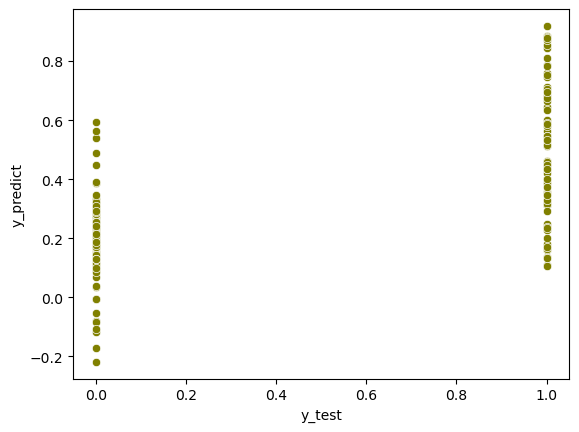

In [48]:
#Analyzing the residulas:
residuals = y_test-y_predict
sns.scatterplot(x=y_test, y=y_predict, color='olive')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

<AxesSubplot:xlabel='basement', ylabel='Density'>

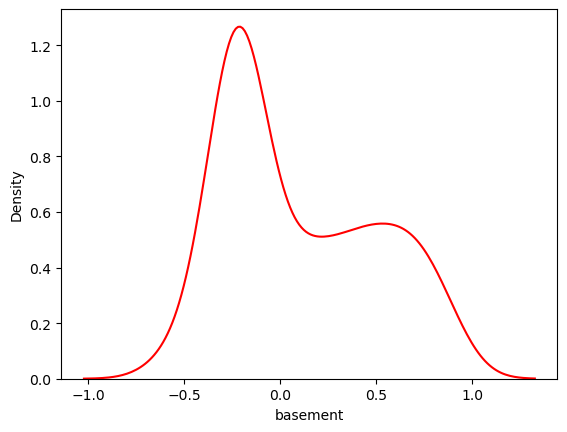

In [49]:
sns.distplot(residuals, color='r', hist=False)

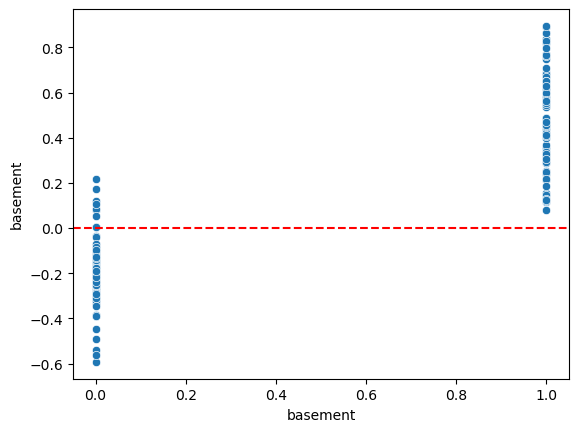

In [50]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', ls='--')

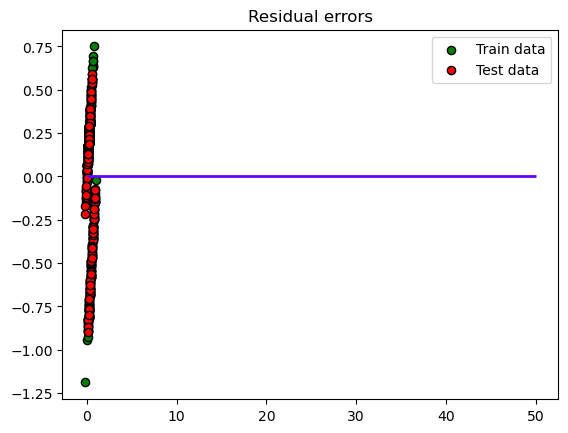

In [51]:
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, color = "green", s = 35, edgecolor='black', label = 'Train data')
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, color = "red", s = 35, edgecolor='black', label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, colors='#5e03fc', linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [52]:
#Saving model into pickle file
import pickle

In [53]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [54]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [55]:
mp.predict(x_test)

array([ 0.2255501 , -0.00582991,  0.2786369 ,  0.13425951,  0.2417541 ,
        0.22827508,  0.64525096,  0.5831629 ,  0.71072285,  0.23694577,
        0.38773903,  0.30624558,  0.10739467,  0.32148793,  0.51479062,
        0.31408393,  0.53326496,  0.17510898,  0.40194399,  0.74749704,
        0.46273009,  0.20523326,  0.1091227 ,  0.1369663 ,  0.63269166,
        0.19251632,  0.2046098 ,  0.23026063,  0.16079324,  0.19941383,
        0.45643007,  0.5114794 ,  0.31185087,  0.23692628,  0.35717533,
        0.29047508,  0.19182782,  0.78658861,  0.15300081,  0.70568819,
        0.32187175,  0.18213793,  0.24734145, -0.08067922,  0.2441677 ,
        0.76010416,  0.29972201,  0.03550897,  0.48965508,  0.38695544,
        0.5926975 ,  0.42019121,  0.84605407,  0.38966636,  0.32032526,
        0.1646737 ,  0.53818587, -0.11879409, -0.17253649,  0.21588507,
        0.26335883,  0.2647887 ,  0.2251749 ,  0.20859945,  0.24151914,
        0.66356715,  0.22351911,  0.21482291,  0.60053185, -0.21

In [56]:
x_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus
333,3920000,3000,3,1,2,1,0,0,0,0,1
37,7980000,9000,4,2,4,1,0,1,2,0,0
396,3500000,3640,2,1,1,1,0,0,1,0,1
494,2730000,6800,2,1,1,1,0,0,0,0,2
536,1960000,3420,5,1,2,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
284,4270000,7770,2,1,1,1,0,0,1,0,0
246,4550000,3520,3,1,1,1,0,0,0,1,1
352,3780000,5830,2,1,1,1,0,0,2,0,2
512,2520000,3000,2,1,2,1,0,0,0,0,0
